### 다중분류 - 아이리스
- 베스트 모델 콜백, 조기종료 콜백 사용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

- 전처리

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [13]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
Y_onehot = to_categorical(iris.target)
X_train, X_test, Y_train, Y_test = train_test_split(
    iris_std, Y_onehot, stratify=Y_onehot, test_size=0.2, random_state=seed
)

- 모델 정의/설정/학습/평가

In [14]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
model = Sequential([
    Dense(12, input_dim=4, activation='relu'),      #  48 + weight : 12?
    Dense(8, activation='relu'),        # 96 + weight : 8?
    Dense(3, activation='softmax')      # 24 + bias : 3
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                60        
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [16]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [17]:
mc = ModelCheckpoint('models/iris_best.h5', monitor='val_loss', verbose=0,
                     save_best_only=True)
es = EarlyStopping(patience=20)     # monitor='val_loss' default 생략

In [19]:
hist = model.fit(X_train, Y_train, validation_split=0.2,
                 epochs=5000, batch_size=100, verbose=0,
                 callbacks=[mc, es])

In [20]:
best_model = load_model('models/iris_best.h5')
best_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 134ms/step - loss: 0.5070 - accuracy: 0.9333


[0.5070006847381592, 0.9333333373069763]

- 시각화

In [21]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)
len(y_acc)

5000

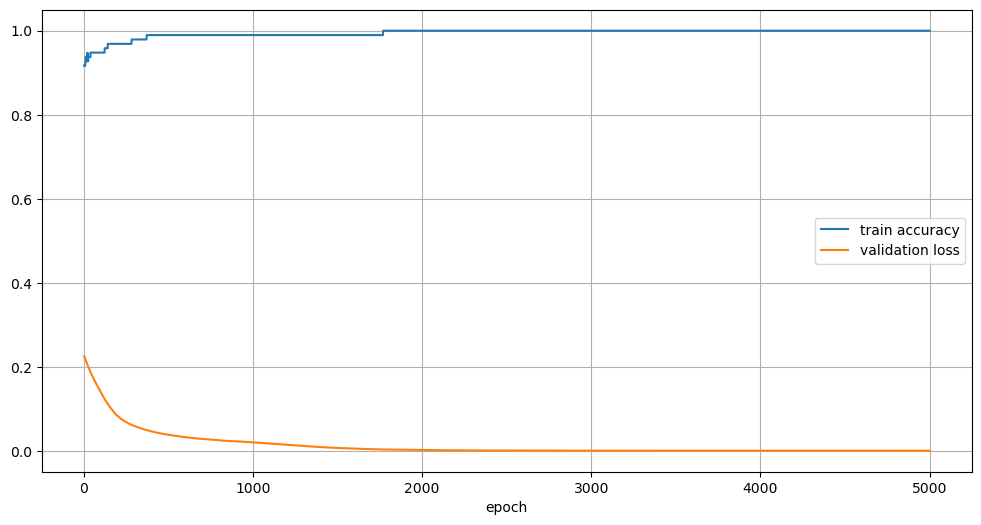

In [22]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()